# Medical Appointment No-Shows

---

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>    

---

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical apppointments in Brazil and examines whether or not patientis show up for their scheduled appointments.  The analysis will focus on trends and patterns pertaining to patient attendance.

The data contains the following attributes: 
* PatientId
* AppointmentID
* Gender
* ScheduledDay
* AppointmentDay
* Age 
* Neighbourhood
* Scholarship 
* Hipertension
* Diabetes
* Alcoholism
* Handcap
* SMS_received
* No-show

The following questions will be explored:
* What is the relation between no-shows and gender?
* What is the relation between no-shows and age?
* How does Lead Time affect whether a patient shows up for their appointment?
* Do SMS text message reminders improve the likelihood of an appointment being kept?

In [40]:
# Add libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

---

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [41]:
# Loading the dataset and initial inspection of dataframe.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
# Inspecting the shape of the dataframe.
df.shape

(110527, 14)

In [43]:
# Checking for null values and inspecting data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [44]:
# Inspecting the count of unique elements
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [45]:
# Checking for duplicate rows.
sum(df.duplicated())

0

In [46]:
# Check numerical attributes.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [47]:
# Over what time period does the AppointmentDay column cover.
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [48]:
# Over what time period does the ScheduledDay column cover.
df.ScheduledDay.min(), df.ScheduledDay.max()

('2015-11-10T07:13:56Z', '2016-06-08T20:07:23Z')

## Initial Observations

* There are 110,527 rows and 14 columns of data in this dataset.
* 62,299 patients schedule 110,527 appointments.
* The dates of appointments cover the period from May 29, 2016 through June 08, 2016.
* The dates these appointments were scheduled cover November 11, 2015 through June 08, 2016.


## Data Cleaning

After analyzing the data, the following items need to be addressed:
* PatientID should be converted from a float to an int.
* Date from ScheduledDay and Appointment day should be extracted and converted to datetime format.
* Spelling corrections should be address (Hipertension should be Hypertension.  Handcap should be Handicap)
* A new column (LeadTime) will be created to examine the days between when an appointment is scheduled and the date of the appointment.
* An numeric integeger column to inidcate whether an appointment was skipped will be created.

### Datatype Conversion

In [49]:
# Convert PatientID from float to int
df['PatientId'] = df['PatientId'].astype('int64')

### Date Extraction

In [50]:
# Convert ScheduledDay and AppointmentDay columns from string to datetime.
df.iloc[:, 3:5] = df.iloc[:, 3:5].apply(pd.to_datetime, errors='coerce')

In [51]:
# Remove hour information from ScheduledDay
df['ScheduledDay'] = df['ScheduledDay'].dt.date

In [52]:
# Remove hour information from AppointmentDay
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [53]:
# Convert ScheduledDay and AppointmentDay columns back to datetime.
df.iloc[:, 3:5] = df.iloc[:, 3:5].apply(pd.to_datetime, errors='coerce')

In [54]:
# Confirm ScheduledDay and AppointmentDay are datetime type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [55]:
# Confirm ScheduledDay and AppointmentDay appear to be formatted correctly.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Spelling Errors

In [56]:
# Correct spelling of two column names
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'})

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Lead Time

In [57]:
# Creating a new column called 'LeadTime' to measure the number of days between date of scheduling and date of appointment.
df['LeadTime'] = df['AppointmentDay'] - df['ScheduledDay']

In [58]:
# Converting LeadTime from TimeDelta datatype to days integer.
df['LeadTime'] = df['LeadTime'].dt.days

In [59]:
# Confirming datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  LeadTime        110527 non-null  int

### No-Show Numeric
> Creating an numeric integeger column to inidcate whether an appointment was skipped.  1 means no-show, 0 means the appointment was kept.

In [60]:
df['no-show_numeric'] = np.where(df['No-show']=='Yes', 1, 0)

In [61]:
# Confirming column was created.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110527 non-null  int64         
 1   AppointmentID    110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   ScheduledDay     110527 non-null  datetime64[ns]
 4   AppointmentDay   110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hipertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handcap          110527 non-null  int64         
 12  SMS_received     110527 non-null  int64         
 13  No-show          110527 non-null  object        
 14  LeadTime         110

---

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What is the relationship between no-shows and gender?

In [62]:
# First looking at the number of female patients vs male patients.l
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [63]:
# Group by gender and count the visits vs no-shows
gender_data = df.groupby('Gender')["No-show"].value_counts()
gender_data

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

Text(0, 0.5, 'Number of appointments')

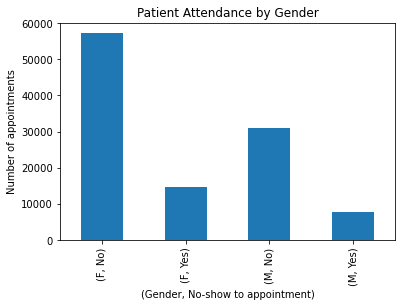

In [64]:
# plot the graph
gender_data.plot(kind='bar')
plt.title('Patient Attendance by Gender')
plt.xlabel('(Gender, No-show to appointment)')
plt.ylabel('Number of appointments')

In [65]:
# Looking at the mean no-show rate by gender.
df[['Gender','no-show_numeric']].groupby(['Gender'], as_index=True).agg(['mean'])

,no-show_numeric
,mean
Gender,
F,0.203146
M,0.199679


### Q1 Conclusion:
> In terms of quantity, more female patients did not attend their scheduled appointments, but this is due to the fact that the sample of data contained more females.  On average males and females did not show up to scheduled appointments at roughly the same rates.

---

### Question 2: What is the relationship between no-shows and age?

In [66]:
# First, let's calculate the average age of patients who showed up for their appointments.
showed = df['No-show'] == 'No'
no_showed = df['No-show'] == 'Yes'
df.Age[showed].mean()

37.790064393252315

In [67]:
# Also, calculate the average age of patients who did not showe up for their appointments.
df.Age[no_showed].mean()

34.31766656212196

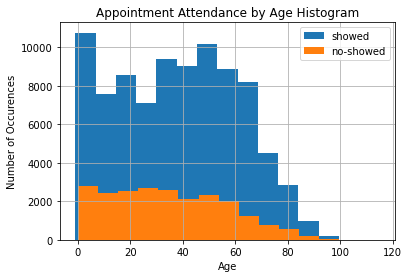

In [68]:
# Plot the attendance on a histogram
df.Age[showed].hist(alpha=1, bins=15, label='showed')
df.Age[no_showed].hist(alpha=1, bins=15, label='no-showed')
plt.title('Appointment Attendance by Age Histogram')
plt.xlabel('Age')
plt.ylabel('Number of Occurences')
plt.legend();

### Q2 Conclusion:
> It seems that older patients tend to keep their appointments while younger teen and young adult patients are more likely to not show up for their appointment. 

---

### Question 3: How does Lead Time affect whether a patient shows up for their appointment?
> Lead Time is the duration of days between when an appointment is scheduled and the date of the appointment

In [69]:
#First let's look at the values in LeadTime
print('LeadTime:',sorted(df.LeadTime.unique()))

LeadTime: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


Text(0, 0.5, 'Number of patients')

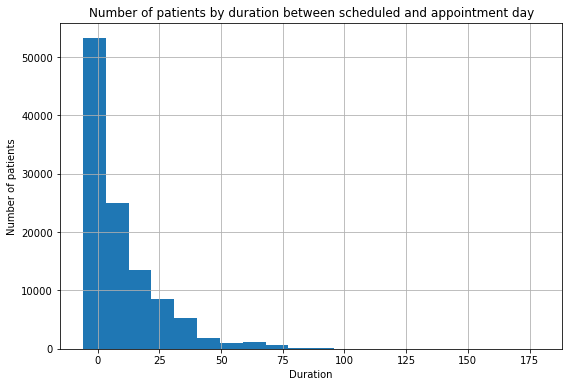

In [70]:
# Now let's view a historgram of lead time
df.LeadTime.hist(bins =20, figsize = (9, 6));
plt.title('Number of patients by duration between scheduled and appointment day')
plt.xlabel('Duration')
plt.ylabel('Number of patients')

In [71]:
# Generate descriptive statistics of LeadTime.
df.LeadTime.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: LeadTime, dtype: float64

In [72]:
# Create 4 categories for lead time analysis
bins = [-7, 0, 4, 15, 180]
bin_names = ["Sameday", "1-4Days", "5-15Days", ">15Days"]
df['LeadTime_range'] = pd.cut(df['LeadTime'], bins, labels = bin_names)

In [73]:
# Create variables for each bucket.
bin1 = df.query('LeadTime_range == "Sameday"')
bin2 = df.query('LeadTime_range == "1-4Days"')
bin3 = df.query('LeadTime_range == "5-15Days"')
bin4 = df.query('LeadTime_range == ">15Days"')

In [74]:
# View the percentage of no-shows grouped by LeadTime groups.
leadtime_noshow = df[['LeadTime_range', 'no-show_numeric']].groupby(['LeadTime_range'], as_index=True).mean().sort_values(by='no-show_numeric', ascending=True)
leadtime_noshow

,no-show_numeric
LeadTime_range,
Sameday,0.046593
1-4Days,0.229902
5-15Days,0.285381
>15Days,0.327059


Text(0, 0.5, 'No-show percentage')

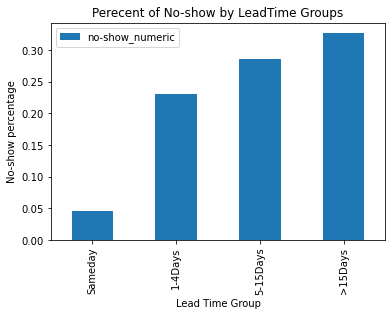

In [75]:
# plot the graph
leadtime_noshow.plot(kind='bar')
plt.title('Perecent of No-show by LeadTime Groups')
plt.xlabel('Lead Time Group')
plt.ylabel('No-show percentage')


### Q3 Conclusion:
> Unsurprisingly, there is a fairly strong correlation between lead time and whether an appointment is kept.  It seems that the longer the lead time, the greater the chances are that a patient will not keep their appointment.

---

### Question 4: Do SMS text message reminders improve the likelihood of an appointment being kept? 

In [76]:
# First let's look at how many patients received text message reminders.
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

> 1 inidicates a text message was received, while 0 indicates a text message was not received.

Text(0, 0.5, 'Number of appointments')

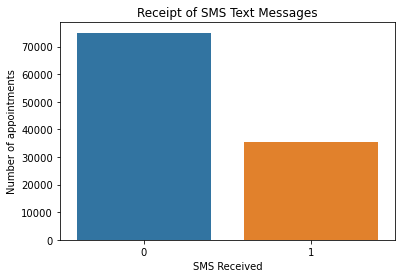

In [85]:
# Plot results on a bar chart
sb.countplot(data=df, x='SMS_received');
plt.title('Receipt of SMS Text Messages')
plt.xlabel('SMS Received')
plt.ylabel('Number of appointments')

In [78]:
# Using the previously created no-show numeric, let's look only at the no shows.
df[['SMS_received', 'no-show_numeric']].groupby(['SMS_received'], as_index=True).mean().sort_values(by='no-show_numeric', ascending=False)

,no-show_numeric
SMS_received,
1,0.275745
0,0.167033


> Of the group that received text message reminders, 27.5% did not show up.   Conversely, only 16.7% from the group that did not receive reminders were no-shows.
> This is strange.  The group that recieved text message reminders actually had a higher rate of no-show.  One would assume that a text message reminder would improve the chances of an appointment being kept.

In [79]:
# Let's add a secondary group from the previously created LeadTime_range column and analze this some more.
dfg = df[['SMS_received', 'LeadTime_range', 'no-show_numeric']].groupby(['SMS_received', 'LeadTime_range'], as_index=True).agg(['mean']).sort_values(by='LeadTime_range', ascending=False)
dfg

,,no-show_numeric
,,mean
SMS_received,LeadTime_range,
0,>15Days,0.371032
1,>15Days,0.298932
0,5-15Days,0.315450
1,5-15Days,0.265549
0,1-4Days,0.231865
1,1-4Days,0.221970
0,Sameday,0.046593
1,Sameday,NaN


> This looks more in line with what I would expect.  Longer lead times show higher rates of no-shows, and receiving a text message seems to improve the chances of an appointment being kept. 
> But why did the previous no-show percentage look so strange?

In [80]:
# Let's look at the count of patients in each group.
dfg2 = df[['SMS_received', 'LeadTime_range', 'no-show_numeric']].groupby(['SMS_received', 'LeadTime_range'], as_index=True).agg(['count']).sort_values(by='LeadTime_range', ascending=False)
dfg2

,,no-show_numeric
,,count
SMS_received,LeadTime_range,
0,>15Days,10239
1,>15Days,16007
0,5-15Days,10233
1,5-15Days,15515
0,1-4Days,16005
1,1-4Days,3960
0,Sameday,38568
1,Sameday,0


Text(0, 0.5, 'Number of appointments')

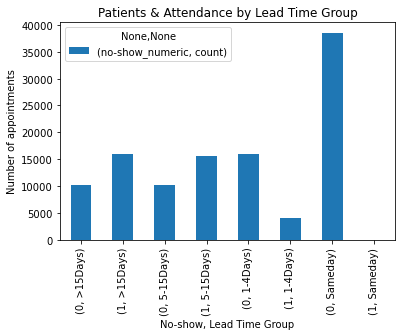

In [83]:
#Plot the results on a bar chart.
dfg2.plot(kind='bar')
plt.title('Patients & Attendance by Lead Time Group')
plt.xlabel('No-show, Lead Time Group')
plt.ylabel('Number of appointments')

> The answer lies in the Sameday group.  An overwhelming number of patients exist in the Sameday group who did not receive a text message.  It would seem that most patients did not receive text message reminders because they were probably walk-ins or that the hospital does not send text message reminders for same-day appointments.

In [82]:
# Show pivot table of no-shows grouped by LeadTime group in order to more easily compare differences.
pd.pivot_table(df, values='no-show_numeric', index=['LeadTime_range'], columns=['SMS_received'], aggfunc=np.mean)

SMS_received,0,1
LeadTime_range,,
Sameday,0.046593,NaN
1-4Days,0.231865,0.221970
5-15Days,0.315450,0.265549
>15Days,0.371032,0.298932


### Q4 Conclusion: Text message reminders improve chances of appointments being kept.
> SMS text message reminder do seem to improve the likelyhood of an appointment being kept.  Text messages are most successful in situations where a patient schedules an appointment greater than 15 days out. 

<a id='conclusions'></a>
## Conclusions
My analysis pertaining to appointment no-shows revealed the following:
-  Gender differences showed minimal correlation to whether a patient kept their appointment.
-  In general, older patients seem to be more likely to show up for their appointments.
-  As the number of days between when an appointment is scheduled and the date of the appointment increases, the likelihood of an appointment no-show also increases.
-  Text message reminders are a useful tool for reducing appointment no-shows, especially for those patients that schedule appointments greater than 15 days out.
### Limitations
The scope of the study is limited to the location from which the data was collected and the time period it covers.  Ideally, the dataset would atleast cover an entire year to point out any seasonal fluctuations.  More information, such as time of appointment, distance of patient from the clinic, and whether the patient was employed would have been useful to the study. Additionally, a larger dataset would add confidence to any of the conclusions drawn.